In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/UAP/diamonds.csv'

data = pd.read_csv(file_path)
data

Mounted at /content/drive


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [ ]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Encode categorical variables if present
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
# Assigning the features as X and target as y
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Create and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 310098.8348068435
R-squared: 0.9805090489628956


In [ ]:
median_price = y_train.median()
y_train_class = (y_train > median_price).astype(int)
y_test_class = (y_test > median_price).astype(int)

rf_model_class = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_class.fit(X_train, y_train_class)
y_pred_class = (rf_model_class.predict(X_test) > 0.5).astype(int)


print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6851
           1       0.98      0.98      0.98      6629

    accuracy                           0.98     13480
   macro avg       0.98      0.98      0.98     13480
weighted avg       0.98      0.98      0.98     13480



In [ ]:
pred_df = pd.DataFrame(X_test, columns=X.columns)
pred_df['true_price'] = y_test
pred_df['pred_price'] = y_pred
pred_df

,carat,cut,color,clarity,depth,table,x,y,z,true_price,pred_price
52066,0.79,2,3,3,60.8,57.0,5.99,5.96,3.63,2453,2230.00
14842,1.24,2,5,2,62.4,57.0,6.89,6.87,4.29,5976,5676.00
3520,0.72,4,3,1,63.3,54.0,5.64,5.73,3.60,3405,3803.94
47046,0.50,2,0,5,62.9,54.0,5.09,5.05,3.19,1819,1797.17
36135,0.33,3,1,5,60.6,60.0,4.48,4.43,2.70,928,899.36
...,...,...,...,...,...,...,...,...,...,...,...
23907,2.12,4,6,3,62.3,61.0,8.16,8.21,5.10,12030,12251.91
25029,0.30,4,2,4,59.8,60.0,4.39,4.31,2.60,640,770.88
35636,0.36,4,4,3,61.2,55.0,4.59,4.62,2.81,475,524.30
20554,1.60,3,6,4,61.3,59.0,7.49,7.52,4.60,8870,8766.00


In [ ]:
# Save model
import joblib
joblib.dump(rf_model, 'rf_model.h5')
print("Model saved as model.h5")

Model saved as model.h5


# **FFNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Encode categorical features (if any)
if data.select_dtypes(include=['object']).shape[1] > 0:
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [ ]:
# Define features and target
X = data.drop(columns=['price'])
y = data['price']

y = (y > y.median()).astype(int)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Build FFNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9426 - loss: 0.2131 - val_accuracy: 0.9595 - val_loss: 0.1279
Epoch 2/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9575 - loss: 0.1441 - val_accuracy: 0.9599 - val_loss: 0.1167
Epoch 3/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9634 - loss: 0.1247 - val_accuracy: 0.9680 - val_loss: 0.1021
Epoch 4/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9633 - loss: 0.1282 - val_accuracy: 0.9688 - val_loss: 0.1056
Epoch 5/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9627 - loss: 0.1255 - val_accuracy: 0.9688 - val_loss: 0.1158
Epoch 6/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9644 - loss: 0.1225 - val_accuracy: 0.9662 - val_loss: 0.1196
Epoch 7/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1130 - val_accuracy: 0.9688 - val_loss: 0.1132
Epoch 8/50
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9675 - loss: 0.1320 - 

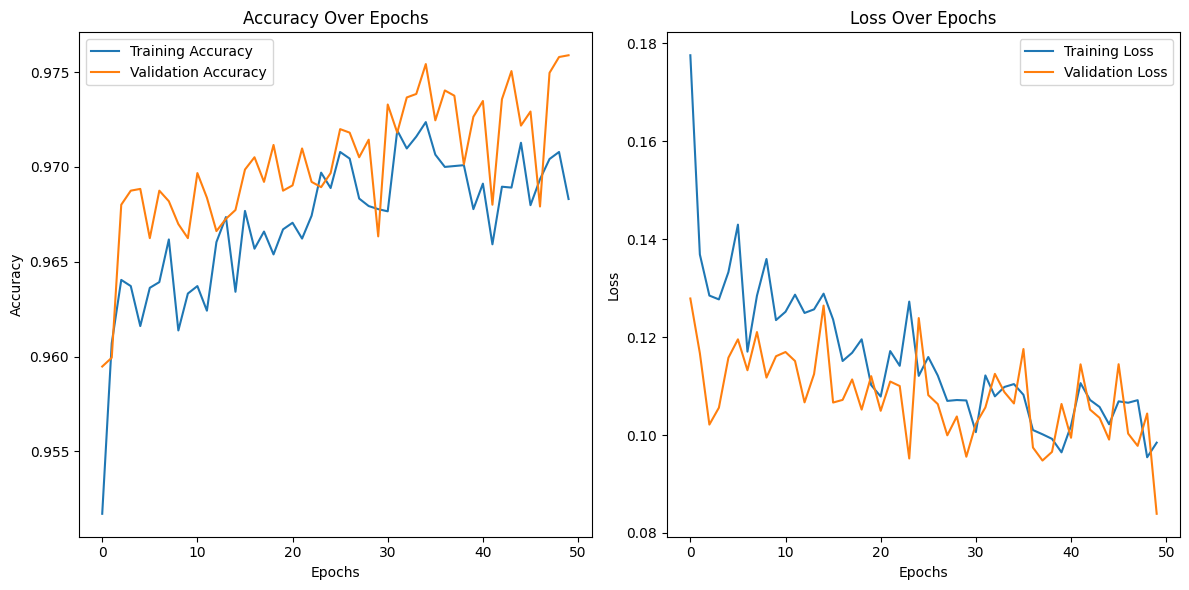

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on Test Data: {accuracy}")

Accuracy on Test Data: 0.9758902192115784


In [ ]:
# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
report = classification_report(y_test, y_pred, target_names=['Low Price', 'High Price'])
print("\nClassification Report:\n")
print(report)

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

              precision    recall  f1-score   support

   Low Price       0.97      0.98      0.98      5371
  High Price       0.98      0.97      0.98      5413

    accuracy                           0.98     10784
   macro avg       0.98      0.98      0.98     10784
weighted avg       0.98      0.98      0.98     10784



In [ ]:
# Save the trained model
model.save('/content/drive/My Drive/ML/UAP/ffnn_diamonds_model.h5')

In [ ]:
# Create a DataFrame for true and predicted prices
true_vs_pred = pd.DataFrame({
    'True Price': y_test,
    'Predicted Price': y_pred.flatten()
})
print("\nTrue vs Predicted Prices:\n")
print(true_vs_pred.head())


True vs Predicted Prices:

       True Price  Predicted Price
34704           0                0
21099           1                1
23685           1                1
39200           0                0
35560           0                0
